In [3]:
import os 
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df= pd.read_csv('./all_pandemics/pandemic_2_43.csv')
df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
df.drop(['Unnamed: 0'], axis=1, inplace=True)
n_hospitalized = np.array(df.loc['n_hospitalized'])
df

,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,300,301,302,303,304,305
n_hospitalized,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000
n_infectious,0.000000,0.000000,0.000000,3.000000,3.000000,7.000000,10.000000,12.000000,14.000000,17.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000
mobility,1.000000,1.010266,1.020528,1.030780,1.041020,1.051243,1.061444,1.071619,1.081764,1.091875,...,0.898053,0.908125,0.918236,0.928381,0.938556,0.948757,0.95898,0.96922,0.979472,0.989734
r_eff,4.182367,4.779849,5.620000,6.059026,5.630071,4.480840,3.457420,2.849048,2.347858,1.988130,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000


In [148]:

def classify(point, pandemic): 
    ratio = (pandemic[point+5] - pandemic[point]) / pandemic[point]
    # print('here')
    # print(pandemic[point])
    # print(pandemic[point+5])
    # print(ratio)
    # print('end')
    if ratio < -0.5: 
        return  'big decrease'
    elif ratio <-0.25:
        return 'decrease'
    elif ratio < 0.25 :
        return 'stable'
    elif ratio < 0.5 :
        return 'increase'
    else : 
        return 'big increase'
    

def classify_bis(point, pandemic) : 
    if pandemic[point] < 100 : 
        return ('stable')
    der = (1/7)*(pandemic[point+7] - pandemic[point]) / pandemic[point]
    derder=(1/49) * (pandemic[point + 7] + pandemic[point-7] - 2*pandemic[point] ) / pandemic[point]
    if  der < -0.05: 
        return  'big decrease'
    elif der <-0.03:
        return 'decrease'
    elif der < 0.03 :
        if abs(derder) > 0.003 : 
            return 'inflexion'
        else :
            return 'stable'
    elif der < 0.2 :
        return 'increase'
    else : 
        return 'big increase'
    

In [135]:
dicocolor={'big decrease':'green', 'decrease':'lightgreen', 'stable':'yellow', 'increase':'orange', 'big increase':'red', 'inflexion':'blue'}

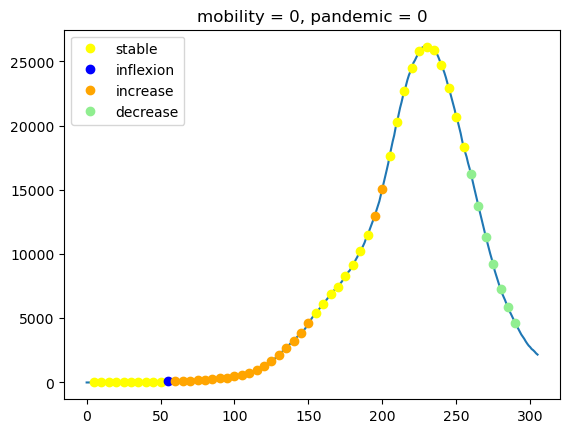

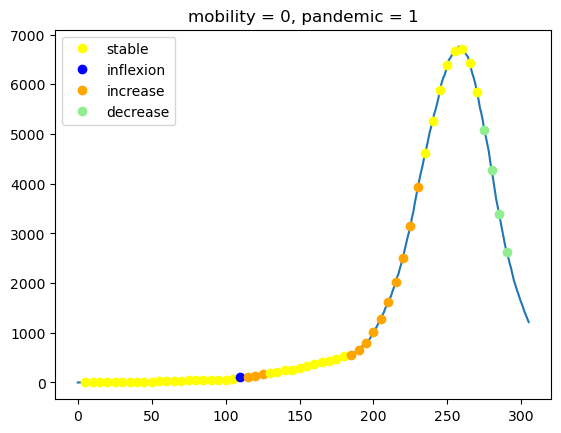

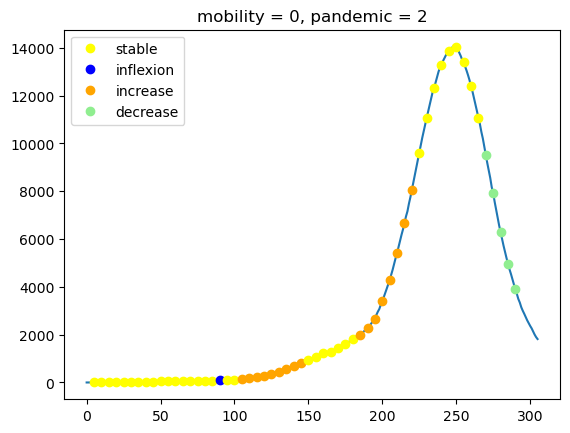

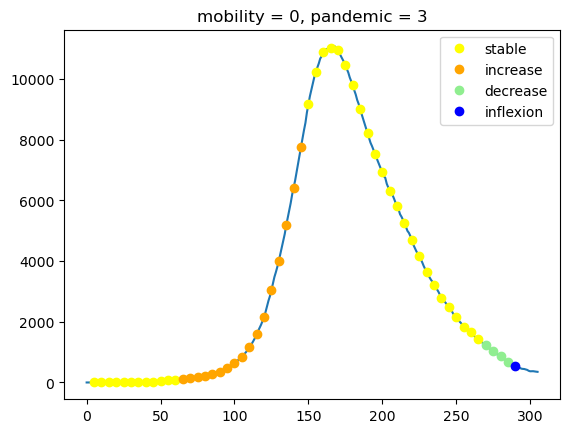

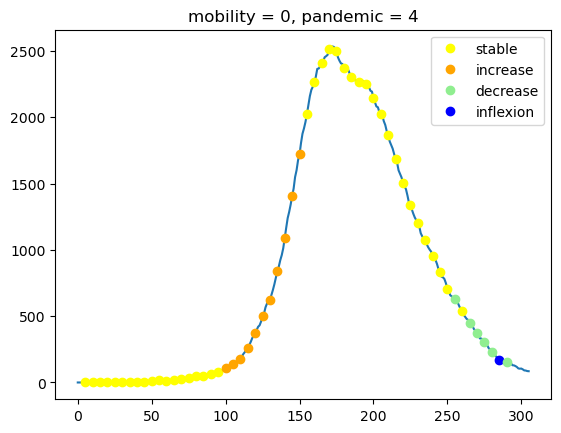

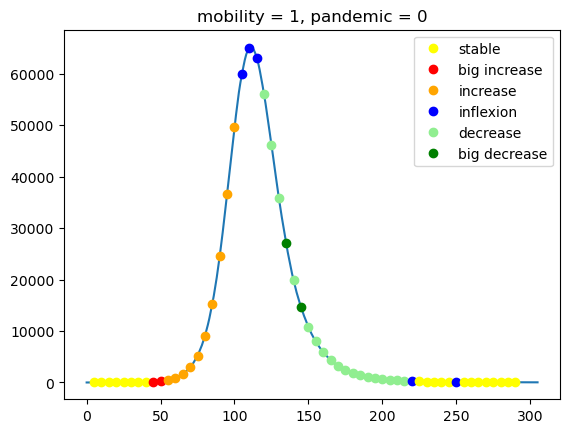

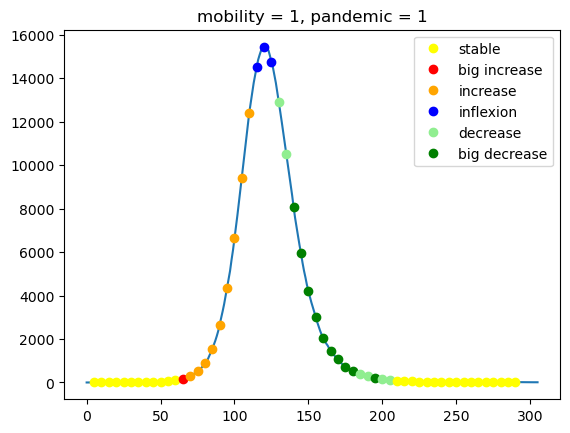

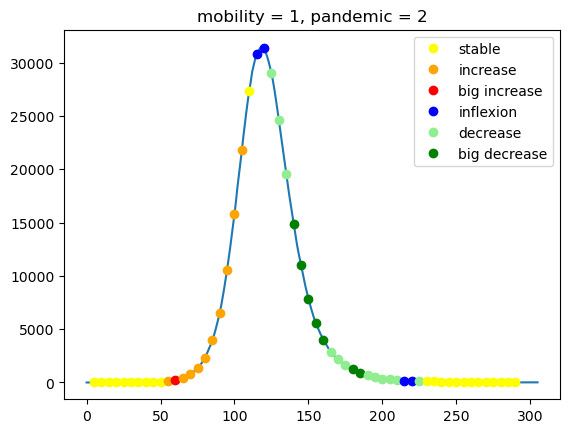

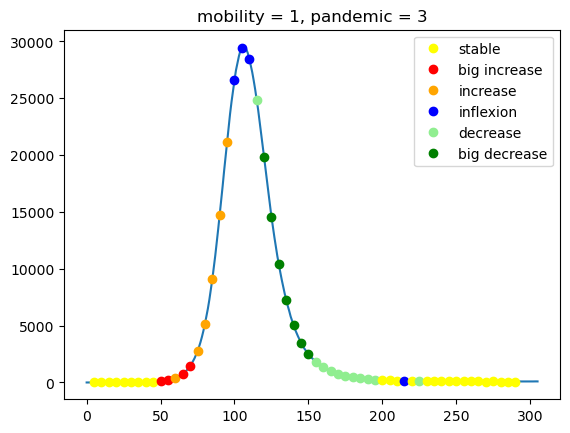

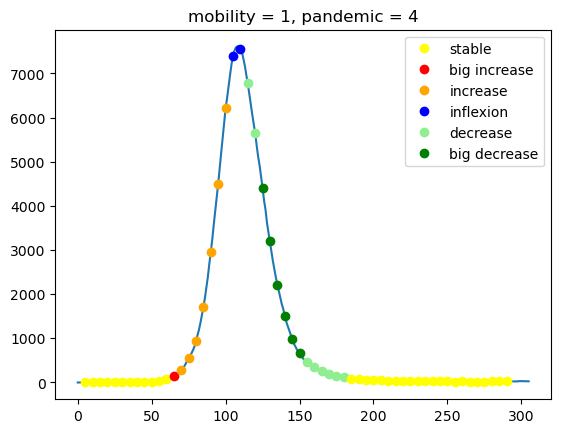

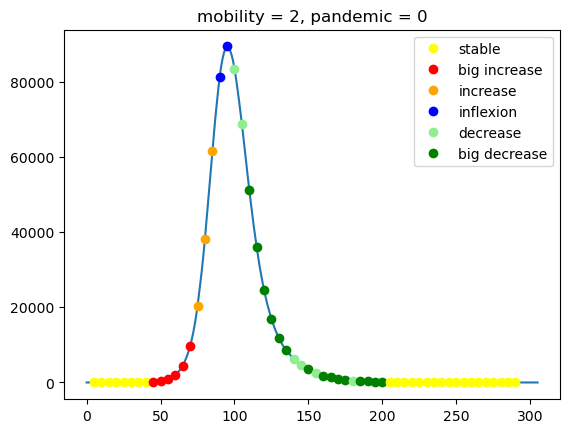

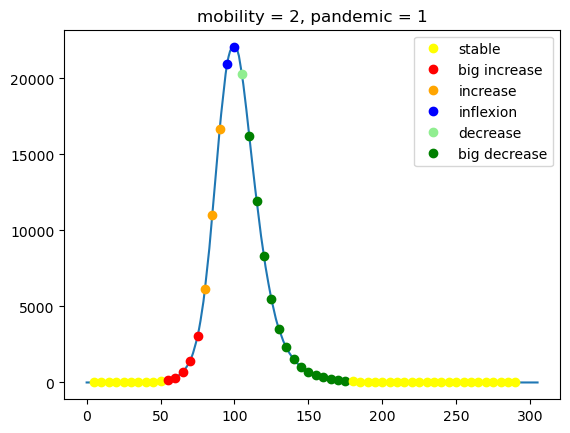

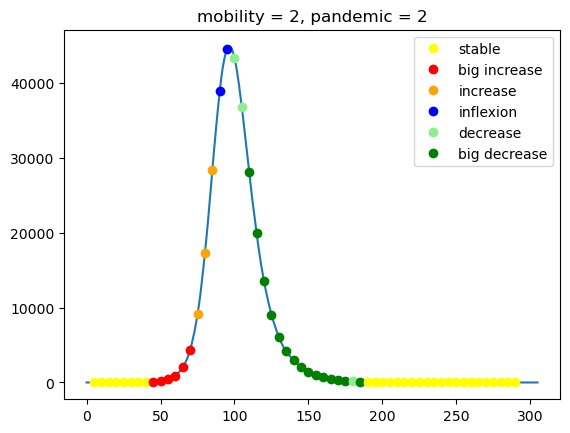

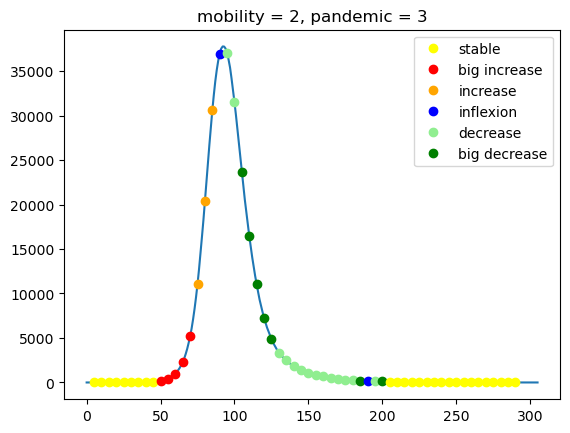

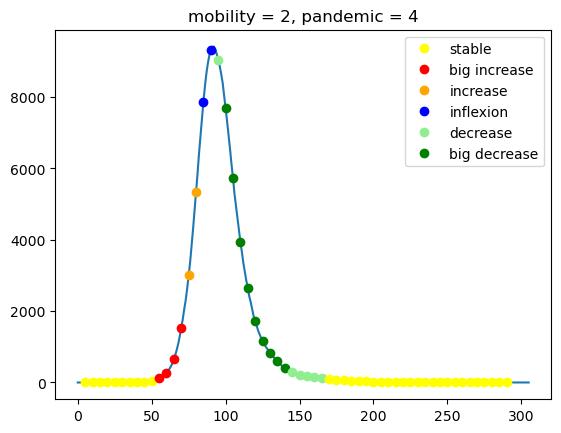

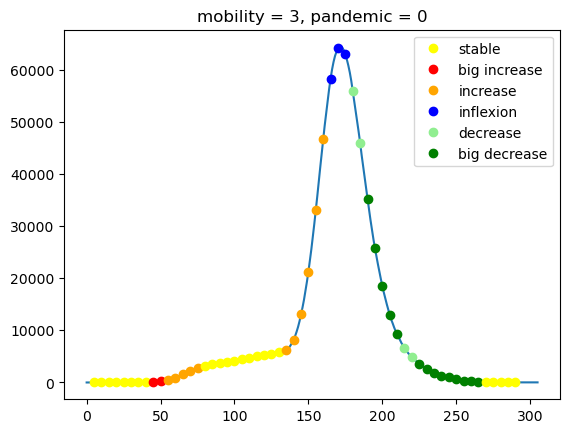

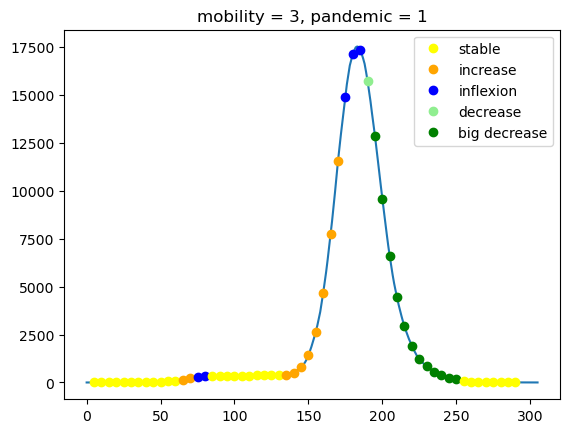

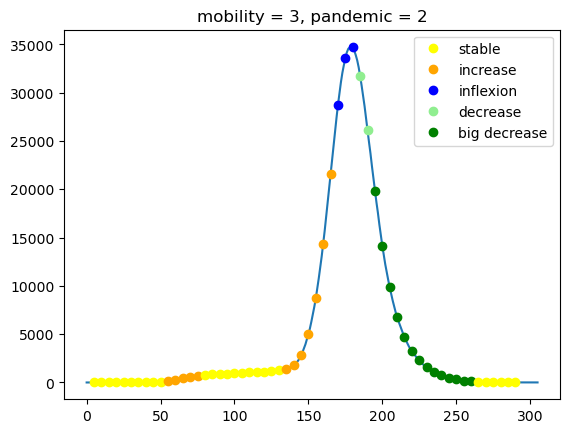

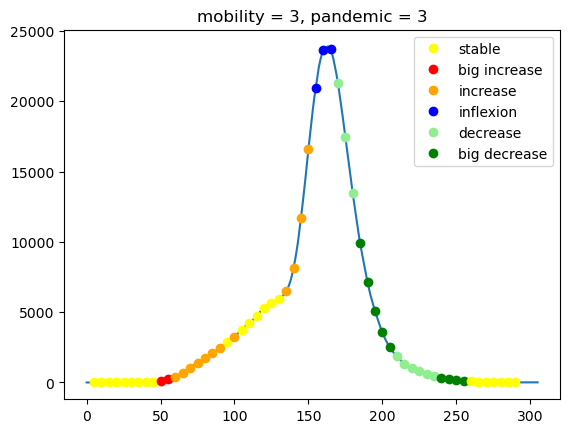

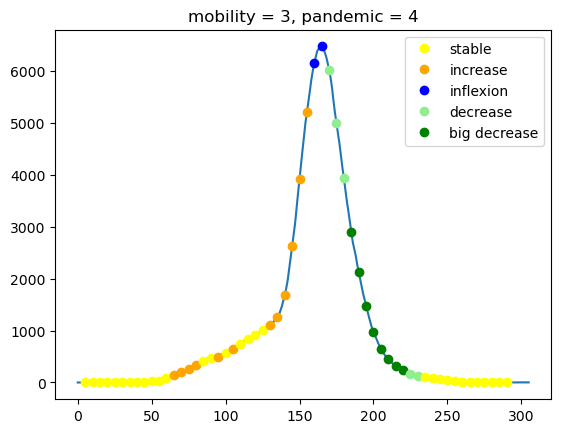

stable = 599
decrease = 132
increase = 192
big decrease = 149
big increase = 39
inflexion = 49


In [155]:
xs=[5*i for i in range(1, 59)]

countstable=0
countdecrease=0
countincrease=0
countbigdecrease=0
countbigincrease=0
countinflexion=0

for mob in range(4): 
    for pand in range(5): 
        label_seen = {}

        df= pd.read_csv('./all_pandemics/pandemic_'+str(mob)+'_'+str(pand)+'.csv')
        df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
        df.drop(['Unnamed: 0'], axis=1, inplace=True)
        n_hospitalized = np.array(df.loc['n_hospitalized'])
        plt.plot(n_hospitalized)
        for x in xs : 
            if classify_bis(x, n_hospitalized) == 'stable' : 
                countstable+=1
            if classify_bis(x, n_hospitalized) == 'decrease' : 
                countdecrease+=1
            if classify_bis(x, n_hospitalized) == 'increase' : 
                countincrease+=1
            if classify_bis(x, n_hospitalized) == 'big decrease' : 
                countbigdecrease+=1
            if classify_bis(x, n_hospitalized) == 'big increase' : 
                countbigincrease+=1
            if classify_bis(x, n_hospitalized) == 'inflexion' : 
                countinflexion+=1
            label = classify_bis(x, n_hospitalized)
            if label not in label_seen:
                plt.plot(x, n_hospitalized[x], 'o', color=dicocolor[label], label=label)
                label_seen[label] = True
            else:
                plt.plot(x, n_hospitalized[x], 'o', color=dicocolor[label])
        plt.title('mobility = '+str(mob)+', pandemic = '+str(pand))
        plt.legend()
        plt.show()

    
print('stable = ' +str(countstable))
print('decrease = ' +str(countdecrease))
print('increase = ' +str(countincrease))
print('big decrease = ' +str(countbigdecrease))
print('big increase = ' +str(countbigincrease))
print('inflexion = ' +str(countinflexion))
